In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/comments_combined.csv")
df.head()

,User Name,Comment,Date,Likes,Sentiment,Sentiment Score
0,Imad,العلاقة الدبلوماسية بين الدول ستساهم في تحقيق ...,2024-11-28 16:14:00,4,Neutral,0.0000
1,Medo,بهاذ العلاقة سيتم تحسين و تعزيز الاستثمارات و ...,2024-11-28 16:15:00,4,Positive,0.7096
2,Naima,العلاقات الدبلوماسية بين البلدين سيسهم في فتح ...,2024-11-28 16:15:00,2,Neutral,0.0000
3,Nadim,أن العلاقات التي تجمع بين بلدان متينة وتتميز ...,2024-11-28 16:16:00,0,Positive,0.9169
4,Khadija,تسعى الحكومة دائما إلى تحقيق ماهو افضل لبلادنا...,2024-11-28 16:16:00,-1,Positive,0.8750


In [ ]:
df.describe()

,Likes,Sentiment Score
count,1220.000000,1220.000000
mean,9.977049,0.259079
std,35.279098,0.589421
min,-230.000000,-0.998400
25%,-1.000000,-0.190475
50%,1.000000,0.401900
75%,11.000000,0.784500
max,402.000000,0.994900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User Name        1220 non-null   object 
 1   Comment          1220 non-null   object 
 2   Date             1220 non-null   object 
 3   Likes            1220 non-null   int64  
 4   Sentiment        1220 non-null   object 
 5   Sentiment Score  1220 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 57.3+ KB


In [ ]:
df.isnull().sum()

,0
User Name,0
Comment,0
Date,0
Likes,0
Sentiment,0
Sentiment Score,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Likes'] = df['Likes'].apply(lambda x: max(0, x))

In [ ]:
print(df.head())

  User Name                                            Comment  \
0      Imad  العلاقة الدبلوماسية بين الدول ستساهم في تحقيق ...   
1      Medo  بهاذ العلاقة سيتم تحسين و تعزيز الاستثمارات و ...   
2     Naima  العلاقات الدبلوماسية بين البلدين سيسهم في فتح ...   
3     Nadim  أن العلاقات التي تجمع  بين بلدان متينة وتتميز ...   
4   Khadija  تسعى الحكومة دائما إلى تحقيق ماهو افضل لبلادنا...   

                 Date  Likes Sentiment  Sentiment Score  
0 2024-11-28 16:14:00      4   Neutral           0.0000  
1 2024-11-28 16:15:00      4  Positive           0.7096  
2 2024-11-28 16:15:00      2   Neutral           0.0000  
3 2024-11-28 16:16:00      0  Positive           0.9169  
4 2024-11-28 16:16:00      0  Positive           0.8750  


In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
average_scores = df.groupby('Sentiment')['Sentiment Score'].mean()

print("Sentiment Distribution:\n", sentiment_counts)
print("\nAverage Sentiment Scores:\n", average_scores)

Sentiment Distribution:
 Sentiment
Positive    764
Negative    333
Neutral     123
Name: count, dtype: int64

Average Sentiment Scores:
 Sentiment
Negative   -0.563828
Neutral     0.005637
Positive    0.658557
Name: Sentiment Score, dtype: float64


<ipython-input-10-48880aaf9b95>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


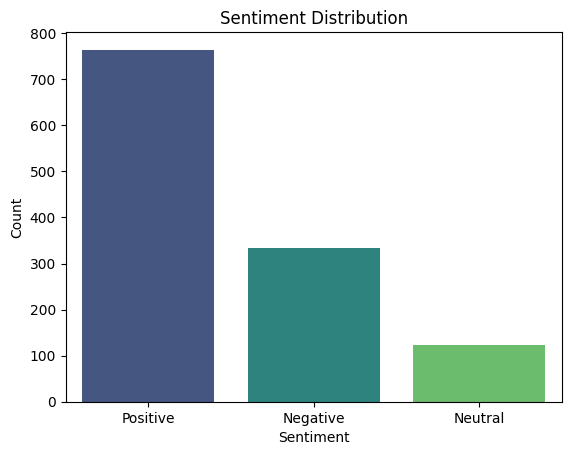

In [ ]:
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

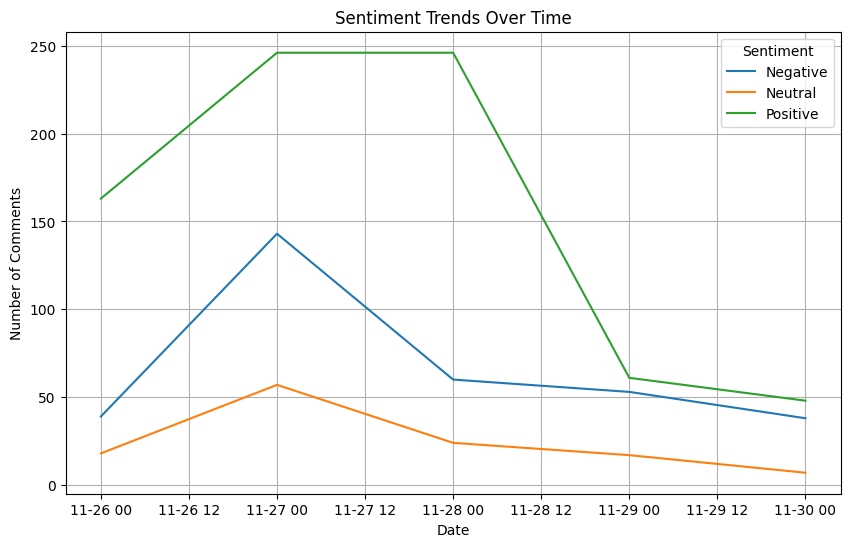

In [ ]:
trend_data = df.groupby([df['Date'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

# Line chart
trend_data.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.grid()
plt.show()

In [ ]:
print(positive_comments[:500])

بهاذ العلاقة سيتم تحسين تعزيز الاستثمارات فتح أبواب كثيرة بلادنا العلاقات تجمع بلدان متينة وتتميز بجودة ودينامية فريدة المستويات السياسية والاقتصادية والثقافية والعلمية الله يحفظ ملكنا الحبيب الغالي تسعى الحكومة دائما تحقيق ماهو افضل لبلادنا بفضل التعاون الدول تهذف تحسين الوضعية الاقتصادية والاجتماعية رئيس الحكومة أكد ان المملكة جعلت جناحها منصة للإعلان هويتها الجديدة للاستثمار والتصدير المغرب لإبراز مكانتها كمنصة صناعية وتصديرية ووجهة جاذبة للاستثمارات الأجنبية ادعو الله ان يحفظ ملكنا ويجعله دا


In [ ]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('arabic'))

In [ ]:
stop_words

{'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آها',
 'آهاً',
 'آهٍ',
 'آهِ',
 'آي',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أف',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أقل',
 'أكتوبر',
 'أكثر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنى',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوه',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أينما',
 'أيها',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلا',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',


In [ ]:
print(positive_comments[:500])

بهاذ العلاقة سيتم تحسين تعزيز الاستثمارات فتح أبواب كثيرة بلادنا العلاقات تجمع بلدان متينة وتتميز بجودة ودينامية فريدة المستويات السياسية والاقتصادية والثقافية والعلمية الله يحفظ ملكنا الحبيب الغالي تسعى الحكومة دائما تحقيق ماهو افضل لبلادنا بفضل التعاون الدول تهذف تحسين الوضعية الاقتصادية والاجتماعية رئيس الحكومة أكد ان المملكة جعلت جناحها منصة للإعلان هويتها الجديدة للاستثمار والتصدير المغرب لإبراز مكانتها كمنصة صناعية وتصديرية ووجهة جاذبة للاستثمارات الأجنبية ادعو الله ان يحفظ ملكنا ويجعله دا


In [ ]:
positive_comments = ' '.join(
    re.sub(r'[^ء-ي\s]', '', comment)  # Keep Arabic letters and spaces
    for comment in df[df['Sentiment'] == 'Positive']['Comment']
    if isinstance(comment, str) and comment.strip()
)
# Remove stopwords
positive_comments = ' '.join(
    word for word in positive_comments.split() if word not in stop_words)

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    font_path='/content/Amiri-Regular.ttf',
    background_color='white',
    width=800,
    height=400
).generate(positive_comments)

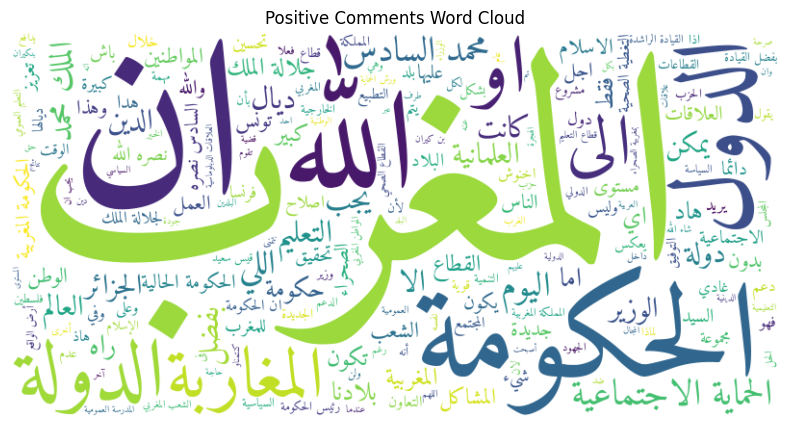

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments Word Cloud')
plt.show()

In [ ]:
negative_comments = ' '.join(
    re.sub(r'[^ء-ي\s]', '', comment)  # Keep Arabic letters and spaces
    for comment in df[df['Sentiment'] == 'Negative']['Comment']
    if isinstance(comment, str) and comment.strip()
)
# Remove stopwords
negative_comments = ' '.join(
    word for word in negative_comments.split() if word not in stop_words)

In [ ]:
wordcloud1 = WordCloud(
    font_path='/content/Amiri-Regular.ttf',
    background_color='white',
    width=800,
    height=400
).generate(negative_comments)

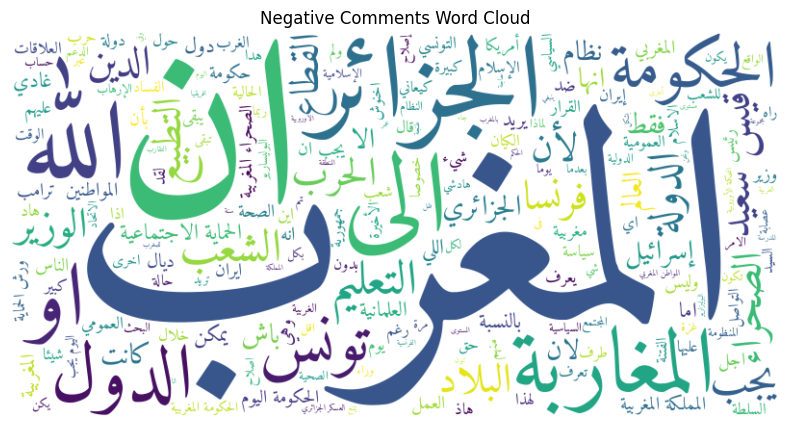

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Comments Word Cloud')
plt.show()

In [ ]:
!pip install Arabic-Stopwords


In [ ]:
data=pd.read_csv("/content/comments.csv")
data.head()

,Video Title,Channel Name,Comment Date,Comment,Likes,Dislikes,Author,Replies
0,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-28T07:58:35Z,تقرير من الخيال,0,0,@Mrabet1825,0
1,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-26T01:37:45Z,اصتياد التماسيح و صرف العفاريت هو الهدف الوحيد...,0,0,@mohamedsabiri698,0
2,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-25T21:47:28Z,المغرب أصبح زريبة للدول القوية، فالإستثمارات و...,0,0,@chamseddine958,0
3,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-25T21:31:50Z,يجب إعادة النظر في التعليم العمومي الكل سواسي...,0,0,@khalidboumay7585,0
4,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-24T05:58:53Z,انايا بوليس داليا تليفون,0,0,@AVANTGARDEPeca,0


In [ ]:
data.isna().sum()

,0
Video Title,0
Channel Name,0
Comment Date,0
Comment,5
Likes,0
Dislikes,0
Author,1
Replies,0


In [ ]:
data.duplicated().sum()

15

In [ ]:
duplicated_rows = data[data.duplicated()]
print(duplicated_rows)

                                             Video Title  \
1716   المغرب يبدء في سياسة المعاملة بالمثل مع الجزائ...   
2950   احمد التوفيق مومياء السياسة في المغرب يطرد خطي...   
4336   عبد الإله بنكيران يكشف أسرار وكواليس السياسة ا...   
4378   عبد الإله بنكيران يكشف أسرار وكواليس السياسة ا...   
4671                            مومياء السياسة في المغرب   
5369   الأزمة بين المغرب والجزائر.. من السيء إلى الأس...   
5417   الأزمة بين المغرب والجزائر.. من السيء إلى الأس...   
9383   هل تودع فرنسا سياسة التوازن في العلاقات بين ال...   
9384   هل تودع فرنسا سياسة التوازن في العلاقات بين ال...   
10059  الملك الحسن الثاني: يعطي رأيه في القضية المشهو...   
10741  الملك الحسن الثاني: يعطي رأيه في القضية المشهو...   
11485  وزير يندد.. هل تعمق المياه الخلاف بين الجزائر ...   
11517  وزير يندد.. هل تعمق المياه الخلاف بين الجزائر ...   
12206  رسالة من الصحراء المغربية إلى أبناء زائر #المغ...   
12207  رسالة من الصحراء المغربية إلى أبناء زائر #المغ...   

                      Channel Name     

In [ ]:
data=data.dropna()
data=data.drop_duplicates()
data


,Video Title,Channel Name,Comment Date,Comment,Likes,Dislikes,Author,Replies
0,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-28T07:58:35Z,تقرير من الخيال,0,0,@Mrabet1825,0
1,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-26T01:37:45Z,اصتياد التماسيح و صرف العفاريت هو الهدف الوحيد...,0,0,@mohamedsabiri698,0
2,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-25T21:47:28Z,المغرب أصبح زريبة للدول القوية، فالإستثمارات و...,0,0,@chamseddine958,0
3,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-25T21:31:50Z,يجب إعادة النظر في التعليم العمومي الكل سواسي...,0,0,@khalidboumay7585,0
4,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-24T05:58:53Z,انايا بوليس داليا تليفون,0,0,@AVANTGARDEPeca,0
...,...,...,...,...,...,...,...,...
18700,من داخل البرلمان وزير الاوقاف يعلن ان المغرب د...,نوالدين القاسمي,2024-11-27T10:45:22Z,فينكم يا رؤساء المجالس العلمية,1,0,@MouradMouhsine-u2y,0
18701,من داخل البرلمان وزير الاوقاف يعلن ان المغرب د...,نوالدين القاسمي,2024-11-27T03:35:52Z,لقد قلت الحقيقة انك علماني ووزيرًا للأوقاف الا...,3,0,@BedreddineMoubtassim,0
18702,من داخل البرلمان وزير الاوقاف يعلن ان المغرب د...,نوالدين القاسمي,2024-11-27T01:09:54Z,🤔🤔🤔🤔😮😮😮,0,0,@jguggyghgf2143,0
18703,ولي العهد المغرب #خليل_البلوشي #اكسبلور #المغر...,kora boom,2024-11-27T19:41:17Z,وقتاش بتنحي الانحناء و بوس الايادي.,0,0,@lila214,0


In [ ]:
import re
def clean_comment(comment):
  url_pattern=re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  cleaned_comment=re.sub(url_pattern,'',comment)
  return cleaned_comment

data['Comment']=data['Comment'].apply(clean_comment)

In [ ]:
data['Comment'] = data['Comment'].apply(lambda x: x.lower())

In [ ]:
pip install langdetect

In [ ]:
from langdetect import detect , DetectorFactory
DetectorFactory.seed= 0
def detect_language(comment):
  try:
    lang=detect(comment)
    return lang
  except:
    return 'Unknown'
data['Language']=data['Comment'].apply(detect_language)

In [ ]:
data

,Video Title,Channel Name,Comment Date,Comment,Likes,Dislikes,Author,Replies,Language
0,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-28T07:58:35Z,تقرير من الخيال,0,0,@Mrabet1825,0,ar
1,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-26T01:37:45Z,اصتياد التماسيح و صرف العفاريت هو الهدف الوحيد...,0,0,@mohamedsabiri698,0,ar
2,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-25T21:47:28Z,المغرب أصبح زريبة للدول القوية، فالإستثمارات و...,0,0,@chamseddine958,0,ar
3,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-25T21:31:50Z,يجب إعادة النظر في التعليم العمومي الكل سواسي...,0,0,@khalidboumay7585,0,ar
4,تقرير أمريكي خطير يكشف حقائق و أسرار عن السياس...,Anas Fetoui | أنس فتوي,2024-11-24T05:58:53Z,انايا بوليس داليا تليفون,0,0,@AVANTGARDEPeca,0,ar
...,...,...,...,...,...,...,...,...,...
18700,من داخل البرلمان وزير الاوقاف يعلن ان المغرب د...,نوالدين القاسمي,2024-11-27T10:45:22Z,فينكم يا رؤساء المجالس العلمية,1,0,@MouradMouhsine-u2y,0,ar
18701,من داخل البرلمان وزير الاوقاف يعلن ان المغرب د...,نوالدين القاسمي,2024-11-27T03:35:52Z,لقد قلت الحقيقة انك علماني ووزيرًا للأوقاف الا...,3,0,@BedreddineMoubtassim,0,ar
18702,من داخل البرلمان وزير الاوقاف يعلن ان المغرب د...,نوالدين القاسمي,2024-11-27T01:09:54Z,🤔🤔🤔🤔😮😮😮,0,0,@jguggyghgf2143,0,Unknown
18703,ولي العهد المغرب #خليل_البلوشي #اكسبلور #المغر...,kora boom,2024-11-27T19:41:17Z,وقتاش بتنحي الانحناء و بوس الايادي.,0,0,@lila214,0,ar


In [ ]:
data['Language'].value_counts()

,count
Language,
ar,16290
Unknown,774
fr,545
so,261
fa,161
id,136
en,97
sw,75
ur,48


In [ ]:
data=data[data['Language']!='Unknown']

In [ ]:
data['Language'].value_counts()

,count
Language,
ar,16290
fr,545
so,261
fa,161
id,136
en,97
sw,75
ur,48
tl,33


In [ ]:
data = data[(data['Language'] != 'en') & (data['Language'] != 'fr') & (data['Language'] != 'es') & (data['Language'] != 'ro') & (data['Language'] != 'cy') & (data['Language'] != 'no') & (data['Language'] != 'de') & (data['Language'] != 'et')& (data['Language'] != 'si')& (data['Language'] != 'af')& (data['Language'] != 'fi')& (data['Language'] != 'pt')& (data['Language'] != 'pl')& (data['Language'] != 'vi')& (data['Language'] != 'sv')& (data['Language'] != 'ca')& (data['Language'] != 'ti')& (data['Language'] != 'lv')& (data['Language'] != 'nl')& (data['Language'] != 'cs')& (data['Language'] != 'pt')& (data['Language'] != 'th')]

In [ ]:
columns_to_drop = ['Video Title', 'Channel Name', 'Likes', 'Dislikes', 'Author', 'Replies']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data['source'] = 'Youtube'

In [ ]:
data

,Comment Date,Comment,Language,source
0,2024-11-28T07:58:35Z,تقرير من الخيال,ar,Youtube
1,2024-11-26T01:37:45Z,اصتياد التماسيح و صرف العفاريت هو الهدف الوحيد...,ar,Youtube
2,2024-11-25T21:47:28Z,المغرب أصبح زريبة للدول القوية، فالإستثمارات و...,ar,Youtube
3,2024-11-25T21:31:50Z,يجب إعادة النظر في التعليم العمومي الكل سواسي...,ar,Youtube
4,2024-11-24T05:58:53Z,انايا بوليس داليا تليفون,ar,Youtube
...,...,...,...,...
18699,2024-11-27T20:40:13Z,انتا كتمتل غير نفسك أيها العلماني الضال حسبي ا...,ar,Youtube
18700,2024-11-27T10:45:22Z,فينكم يا رؤساء المجالس العلمية,ar,Youtube
18701,2024-11-27T03:35:52Z,لقد قلت الحقيقة انك علماني ووزيرًا للأوقاف الا...,ar,Youtube
18703,2024-11-27T19:41:17Z,وقتاش بتنحي الانحناء و بوس الايادي.,ar,Youtube


In [ ]:
import re

def classify_language(comment):
    """
    Classify the language of a comment as 'ar' (Darija-arabic) or 'fr' (darija-French).
    """
    # Regular expressions for Arabic and French characters
    arabic_pattern = re.compile(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]+')  # Arabic Unicode range
    english_pattern = re.compile(r'[\x00-\x7F\x80-\xFF]+')  # English Unicode range

    # Check if the comment contains Arabic or French characters
    if arabic_pattern.search(comment):
        return 'ar'
    elif english_pattern.search(comment):
        return 'fr'
    else:
        return None  # Return None if no Arabic or French characters are found

In [ ]:
data['Language'] = data['Comment'].apply(classify_language)
data

,Comment Date,Comment,Language,source
0,2024-11-28T07:58:35Z,تقرير من الخيال,ar,Youtube
1,2024-11-26T01:37:45Z,اصتياد التماسيح و صرف العفاريت هو الهدف الوحيد...,ar,Youtube
2,2024-11-25T21:47:28Z,المغرب أصبح زريبة للدول القوية، فالإستثمارات و...,ar,Youtube
3,2024-11-25T21:31:50Z,يجب إعادة النظر في التعليم العمومي الكل سواسي...,ar,Youtube
4,2024-11-24T05:58:53Z,انايا بوليس داليا تليفون,ar,Youtube
...,...,...,...,...
18699,2024-11-27T20:40:13Z,انتا كتمتل غير نفسك أيها العلماني الضال حسبي ا...,ar,Youtube
18700,2024-11-27T10:45:22Z,فينكم يا رؤساء المجالس العلمية,ar,Youtube
18701,2024-11-27T03:35:52Z,لقد قلت الحقيقة انك علماني ووزيرًا للأوقاف الا...,ar,Youtube
18703,2024-11-27T19:41:17Z,وقتاش بتنحي الانحناء و بوس الايادي.,ar,Youtube


In [ ]:

data.isna().sum()
data = data.dropna()
data

,Comment Date,Comment,Language,source
0,2024-11-28T07:58:35Z,تقرير من الخيال,ar,Youtube
1,2024-11-26T01:37:45Z,اصتياد التماسيح و صرف العفاريت هو الهدف الوحيد...,ar,Youtube
2,2024-11-25T21:47:28Z,المغرب أصبح زريبة للدول القوية، فالإستثمارات و...,ar,Youtube
3,2024-11-25T21:31:50Z,يجب إعادة النظر في التعليم العمومي الكل سواسي...,ar,Youtube
4,2024-11-24T05:58:53Z,انايا بوليس داليا تليفون,ar,Youtube
...,...,...,...,...
18699,2024-11-27T20:40:13Z,انتا كتمتل غير نفسك أيها العلماني الضال حسبي ا...,ar,Youtube
18700,2024-11-27T10:45:22Z,فينكم يا رؤساء المجالس العلمية,ar,Youtube
18701,2024-11-27T03:35:52Z,لقد قلت الحقيقة انك علماني ووزيرًا للأوقاف الا...,ar,Youtube
18703,2024-11-27T19:41:17Z,وقتاش بتنحي الانحناء و بوس الايادي.,ar,Youtube


In [ ]:
french_comments_df = data[data['Language'] == 'fr']
arabic_comments_df = data[data['Language'] == 'ar']

In [ ]:
french_comments_df

,Comment Date,Comment,Language,source
18,2024-11-09T16:34:33Z,awaddi nta marak faham hta khrya ghi dawi,fr,Youtube
86,2024-10-21T16:35:42Z,wa dima lawr l2aghniya2 aghniya2 o lfoqara2 za...,fr,Youtube
134,2024-10-12T16:10:38Z,"malk 3la 7altek, kola jomla dayerliha ma9ta3 b...",fr,Youtube
153,2024-10-09T09:33:49Z,almaghrib mafih lasayasa lawalo kaydiro libraw...,fr,Youtube
210,2024-10-04T05:49:40Z,big up bro!,fr,Youtube
...,...,...,...,...
18647,2024-01-04T13:14:42Z,hafida allah kaifona al homan howa 3iz ñblada...,fr,Youtube
18652,2024-01-04T05:41:36Z,tozzzzzzze 😂 😜 😂,fr,Youtube
18653,2024-01-04T02:00:57Z,lfikra wsalat walakin andek mouchjila f taabir...,fr,Youtube
18654,2024-01-04T01:58:09Z,allah alwatan almalik . raki tathdri ala dawla...,fr,Youtube


In [ ]:
data.to_csv('youtube_clean.csv')